<a href="https://colab.research.google.com/github/mananraheja/Intro-to-Data-Science-with-Python/blob/master/Copy_of_ece657_assignment_2_q3_SOM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Importing the required libraries

We use numpy and matplotlib to implement the Kohonen Self Organizing Map.

In [ ]:
# Import the required libraries
import numpy as np
import matplotlib.pyplot as plt

# 2. Generate training data of 24 shades of colors

We pick 24 colours from the given dataset (http://www.rapidtables.com/web/color/RGB_Color.htm). We normalize the values to convert them from range [0, 255] to range [0, 1].

In [ ]:
# Generate training data of 24 shades of colors
colours_dataset = {
    "crimson"            : [220,20,60],
    "salmon"             : [250,128,114],
    "maroon"             : [128,0,0],
    "orange"             : [255,165,0],
    "gold"               : [255,215,0],
    "khaki"              : [240,230,140],
    "yellow"             : [255,255,0],
    "forest green"       : [34,139,34],
    "medium spring green": [0,250,154],
    "dark cyan"          : [0,139,139],
    "aqua"               : [0,255,255],
    "sky blue"           : [135,206,235],
    "blue violet"        : [138,43,226],
    "magenta"            : [255,0,255],
    "beige"              : [245,245,220],
    "sienna"             : [160,82,45],
    "misty rose"         : [255,228,225],
    "lavender"           : [230,230,250],
    "black"              : [0,0,0],
    "snow"               : [255,250,250],
    "silver"             : [192,192,192],
    "white"              : [255,255,255],
    "plum"               : [221,160,221],
    "rosy brown"         : [188,143,143]
}

colours = []
colour_labels = []

for key, val in colours_dataset.items():
    colour_labels.append(key)
    colours.append(val)

colours = np.array(colours)

# Normalize the colours to [0, 1] range
colours = colours / 255

# n = np.random.randint(0, 256)

# 3. Define the KSOM dimensions and initialize the weights randomly

We define the KSOM as per the given dimensions (100 x 100) and initialize the weights randomly (100 x 100 x 3), by picking a random integer in [0, 255] and dividing it by 255 to convert it into [0, 1].

In [ ]:
# Define the Kohonen Self Organizing Map
map_size_x, map_size_y = 100, 100

# Randomly initialize the weights
weights = np.empty([map_size_x * map_size_y, 3])

for x in range(0, map_size_x * map_size_y):
    for y in range(0, 3):
        weights[x][y] = np.random.randint(0, 256) / 255

# print(weights)

# 4. Initialize 2D output grid of dimensions 10,000 by 2

We create the 2D output grid with number of rows equal to the product of dimensions as the KSOM. Note that there are 10,000 KSOM neurons, so each row of the output grid represents a unique coordinate (x, y) of the KSOM, and the output grid for the corresponding coordinate is given by [(x * y) / 100, (x * y) % 100]. This way we have 10,000 rows of output grid, each representing a unique coordinate from [0, 0] to [99, 99].

In [ ]:
# Initialize 2D output grid of dimensions 10,000 by 2
output_grid = np.array([[0 for x in range(0, 2)] for y in range(0, map_size_x * map_size_y)])

# fill output_grid with values [x1, x2] for all possible values in [0, 0] to [map_size_x - 1, map_size_y - 1]
for x in range(0, map_size_x * map_size_y):
    output_grid[x][0] = x / map_size_x
    output_grid[x][1] = x % map_size_y

# print(output_grid)

# 5. Make the SOM class that incorporates all the functions

Now we make a class to encapsulate all the functions we need for the KSOM to work. We define the functions to calculate distances between weight matrix and input vector, find out the winning neuron, update the weights, learning rate and sigma values, as well as a function to compute the above in the proper sequence and another function to plot the results.

In [ ]:
# Make the SOM class that incorporates all the functions
class SOM:

    def __init__(self):
        pass

    # Define function to calculate the distance
    def calc_distance(self, input_vector, weight_vector):
        distances = []
        for weight in weight_vector:
            distance = np.linalg.norm(input_vector - weight)
            distances.append(distance)
        return np.array(distances)

    # Define the function to calculate the winner neuron
    def calc_winner(self, input_vector, weight_vector):
        distances = self.calc_distance(input_vector, weight_vector)
        winner = distances.argmin()
        return winner

    # Define function to update the neighbourhood weights
    def calc_update_weights(self, learning_rate, sigma, input_vector, weight_vector):
        winner_index = self.calc_winner(input_vector, weight_vector)
        winner_index_row = np.ceil(winner_index / map_size_x)
        winner_index_col = np.mod(winner_index, map_size_y)
        distance = self.calc_distance(np.array([winner_index_row, winner_index_col]), output_grid)
        s = np.argmin(distance)

        j = 0
        while j < len(weights):
            gaussian_kernel = np.exp(-distance[j] * distance[j] / (2 * sigma * sigma))
            weight_vector[j] = weight_vector[j] + learning_rate * gaussian_kernel * (input_vector - weight_vector[j])

            j += 1

        return weight_vector

    # Define the function to update the learning rate
    def calc_learning_rate(self, k, T, learning_rate):
        return learning_rate * np.exp(-k / T)

    # Define the function to update the sigma
    def calc_sigma(self, k, T, sigma):
        return sigma * np.exp(-k / T)

    # Run this code for different values of sigma and learning rate
    def compute(self, map_size_x, map_size_y, learning_rate, sigma, T):
        # randomly initialized weights
        map_size_x, map_size_y = 100, 100

        weights = np.empty([map_size_x * map_size_y, 3])

        for i in range(0, map_size_x * map_size_y):
            for j in range(0, 3):
                weights[i][j] = np.random.randint(0, 256) / 255

        # Update values as needed
        sigma_0 = sigma
        saved_weights = {}

        n = 0
        while n < T:
            i = np.random.randint(0, 24)
            updated_weights = self.calc_update_weights(learning_rate, sigma, colours[i], weights)
            weights = updated_weights

            updated_learning_rate = self.calc_learning_rate(n, T, learning_rate)
            learning_rate = updated_learning_rate

            updated_sigma = self.calc_sigma(n, T, sigma_0)
            sigma_0 = updated_sigma

            if n == 19:
                w_20 = weights.copy()
                saved_weights["20"] = w_20

            if n == 39:
                w_40 = weights.copy()
                saved_weights["40"] = w_40

            if n == 99:
                w_100 = weights.copy()
                saved_weights["100"] = w_100

            if n == 999:
                w_1000 = weights.copy()
                saved_weights["1000"] = w_1000

            n += 1

        return saved_weights

    # For plotting the images
    def plotter(self, saved_weights, sigma, list_of_epochs):

        # Plot
        w_20 = saved_weights["20"].reshape(map_size_x, map_size_y, 3)
        w_40 = saved_weights["40"].reshape(map_size_x, map_size_y, 3)
        w_100 = saved_weights["100"].reshape(map_size_x, map_size_y, 3)
        w_1000 = saved_weights["1000"].reshape(map_size_x, map_size_y, 3)

        saved_weights_plots = [w_20, w_40, w_100, w_1000]

        subplot_counter = 221

        plt.figure(figsize = (7, 7))

        plt.suptitle('Plotting the images for sigma_0 = ' + str(sigma))

        for i in range(0, len(saved_weights_plots)):
            plt.subplot(subplot_counter + i)
            plt.title('Epoch = ' + str(list_of_epochs[i]))
            plt.imshow(saved_weights_plots[i])


# 6. Define the constants and call the compute function for different parameters

Now we define the constant terms as per the given data and then we instantiate an object of the SOM class and call the compute function with the required arguments. We save the updated weights in a dict, with the keys being the various values of sigma that we were given and the corresponding values listing the weights computed for 20, 40, 100 and 1000 epochs as required.

In [ ]:
# define the constants
T = 1000
learning_rate = 0.8

# List of epochs
list_of_epochs = [20, 40, 100, 1000]

# list of sigmas
list_of_sigmas = [1, 10, 20, 30, 50, 70]

saved_weights_computed = {}

mySOM = SOM()

# Run the compute function for various values of sigma
for sigma in list_of_sigmas:
    saved_weights_computed[sigma] =  mySOM.compute(map_size_x, map_size_y, learning_rate, sigma, T)

# 7. Plot the observations

Now we invoke the plotter function in the SOM class and see how the SOM has organized itself for the given input vector of 24 colours, and compare the results for different values of sigma at different epochs.

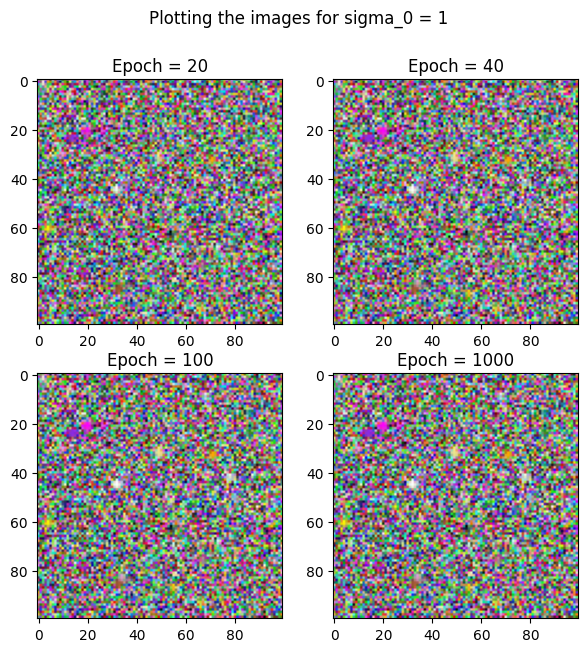

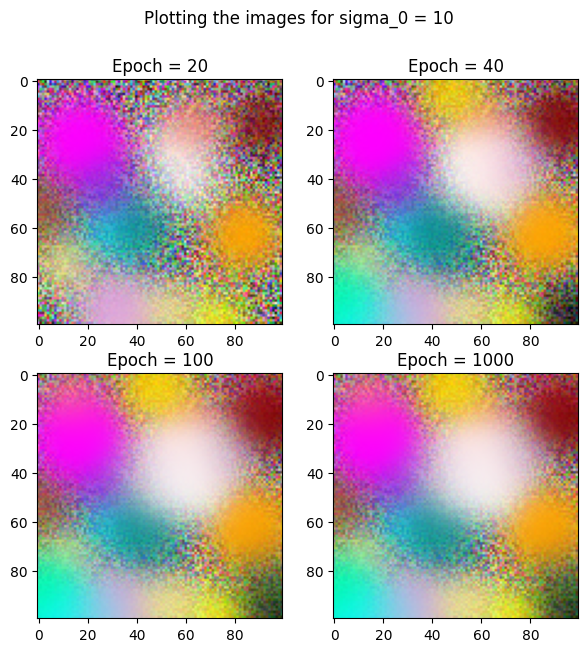

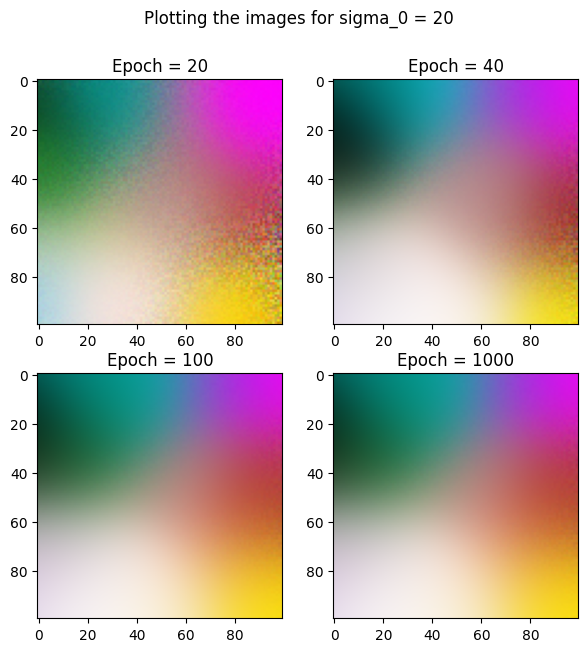

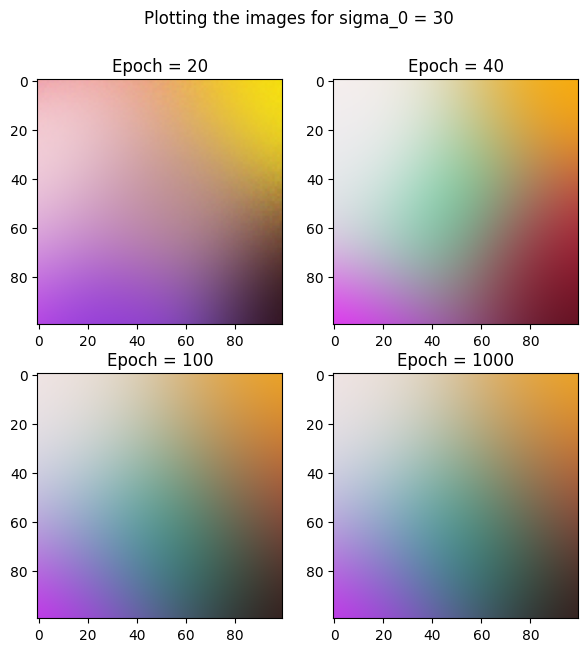

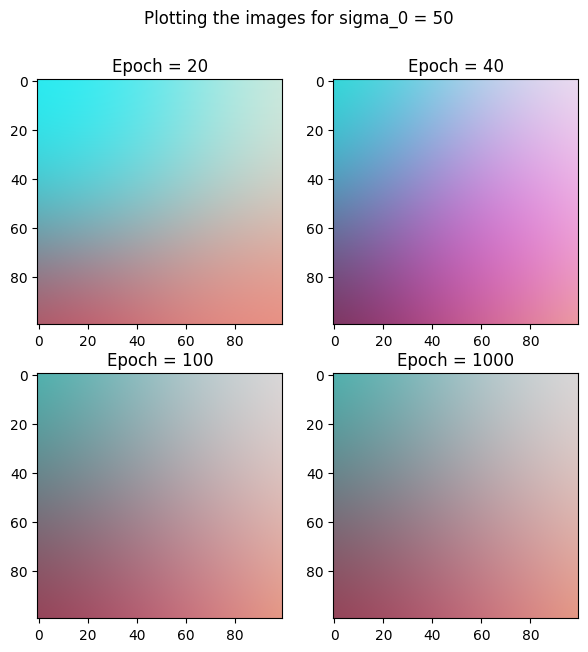

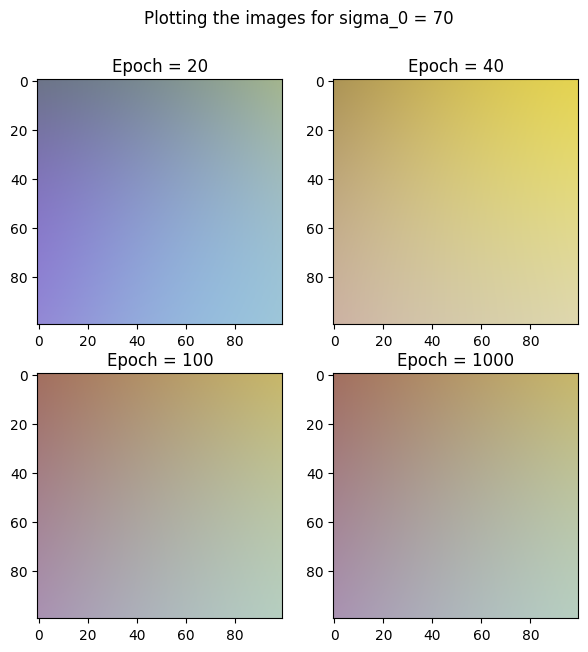

In [ ]:
# Run the plotter function for various values of sigma
for i in range(len(list_of_sigmas)):
    if list_of_sigmas[i] == 70:
        mySOM.plotter(saved_weights_computed[list_of_sigmas[i]], list_of_sigmas[-1], list_of_epochs)
    else:
        mySOM.plotter(saved_weights_computed[list_of_sigmas[i]], list_of_sigmas[i], list_of_epochs)

# 8. Observations

We observe that with more epochs, there is a more organized map over the given input. However, we notice that between epochs 40 and 100, there is a considerable change, and not so much between 100 and 1000.

Moreover, for sigma = 20 and 30, the neighbourhood of the winning neuron seems to be of the most optimal size, wherein we get to see the colours organized in neat clusters with a smooth transition between them (well converged map).

However, for sigma = 10, there is very little organization, as the neighbourhood of the winning neuron is very small, limiting the weight updates to very few (less than 10) neurons in the neighbourhood of the winning neuron.

Further, for sigma = 50 and 70, there is excessive organization, as the neighbourhood of the winning neuron is huge, which leads to weight updation in a major part of the KSOM. With higher epochs, we notice that the colours have more or less homogenized or mixed. Thus, the optimal size of the neighbourhood lies somewhere between sigma = 20 and 30.